In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!cp /content/drive/MyDrive/Abdulla_OCR/Character/anotation_28x28/Test.csv .
!cp /content/drive/MyDrive/Abdulla_OCR/Character/anotation_28x28/Train.csv .

!rm -rf sample_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/abdulla_model/model_1111.h5 .

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [ ]:
train.shape, test.shape

((209966, 785), (38385, 785))

In [ ]:
train.tail(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
209961,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209962,34,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
209963,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209964,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209965,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.tail(5)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634
38380,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38381,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38382,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38383,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38384,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train['label']
x_train = train.drop('label', axis=1)
y_train.shape, x_train.shape

((209966,), (209966, 784))

In [ ]:
x_train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.value_counts()

0     6000
26    5999
20    5999
21    5999
22    5999
23    5999
24    5999
25    5999
27    5999
18    5999
28    5999
29    5999
30    5999
31    5999
32    5999
33    5999
19    5999
17    5999
1     5999
8     5999
2     5999
3     5999
4     5999
5     5999
6     5999
7     5999
9     5999
16    5999
10    5999
11    5999
12    5999
13    5999
14    5999
15    5999
34    5999
Name: label, dtype: int64

In [ ]:
y_test = test['0']
x_test = test.drop('0', axis=1)
y_test.shape, x_test.shape

((38385,), (38385, 784))

In [ ]:
y_test.value_counts()

0     1129
7     1129
1     1129
10    1129
9     1129
8     1129
11    1129
6     1129
5     1129
4     1129
3     1129
2     1129
23    1099
33    1099
32    1099
31    1099
30    1099
29    1099
28    1099
27    1099
26    1099
25    1099
24    1099
34    1099
22    1059
21    1059
20    1059
19    1059
18    1059
16    1059
15    1059
14    1059
13    1059
12    1059
17    1059
Name: 0, dtype: int64

In [ ]:
print("Number of images:", len(test))

Number of images: 38385


In [ ]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
x_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

 **Normalization**

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

**Reshape**
* [np.reshape](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html) detail
* x_train is numpy.ndarray format now

In [ ]:
x_train = x_train.values.reshape(-1,28,28,1)

In [ ]:
x_test = x_test.values.reshape(-1,28,28,1)

In [ ]:
x_test.shape

(38385, 28, 28, 1)

**Label Encoding**
* Use the Scikit to make one-hot encoding label (Be careful about the format), which must be used with **np.array**.
* Detail [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [ ]:
# Use the Scikit to make one-hot encoding label
y_train = pd.DataFrame(data=y_train)
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot.fit(y_train.values)
y_train = one_hot.transform(y_train.values).toarray()

In [ ]:
# Use the Scikit to make one-hot encoding label
y_test = pd.DataFrame(data=y_test)
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot.fit(y_test.values)
y_test = one_hot.transform(y_test.values).toarray()

* Now, y_train becomes** numpy.ndarray**

In [ ]:
y_train, y_train.shape

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 (209966, 35))

**Splitting dataset as train data and cross-validation data**
* Detail [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
from sklearn.model_selection import train_test_split
random_seed = 3
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=random_seed)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((188969, 28, 28, 1), (20997, 28, 28, 1), (188969, 35), (20997, 35))

In [ ]:
from sklearn.model_selection import train_test_split
random_seed = 3
x_te, x_test, y_te, y_test = train_test_split(x_test, y_test, test_size=0.0001, random_state=random_seed)
x_te.shape, x_test.shape, y_te.shape, y_test.shape

((38381, 28, 28, 1), (4, 28, 28, 1), (38381, 35), (4, 35))

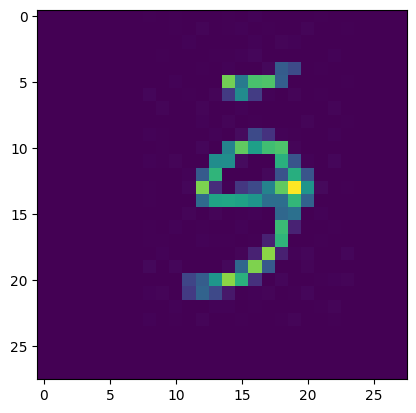

In [ ]:
g = plt.imshow(x_test[0][:,:,0])

**Build AlexNet with Keras**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(filters = 64, input_shape=(28,28,1), kernel_size=(3,3), strides=(1,1), padding='valid'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
    BatchNormalization(),
    
    Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
    BatchNormalization(),
    
    Conv2D(filters=192, kernel_size=(1,1), strides=(1,1), padding='valid'),
    Activation('relu'),
    BatchNormalization(),
    
    Conv2D(filters=192, kernel_size=(3,3), strides=(1,1), padding='valid'),
    Activation('relu'),
    BatchNormalization(),

    Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
    BatchNormalization(),
    
    Flatten(),
    Dense(2048),
    Activation('relu'),
    Dropout(0.4),
    BatchNormalization(),
    
    Dense(2048),
    Activation('relu'),
    Dropout(0.4),
    BatchNormalization(),

    Dense(800),
    Activation('relu'),
    Dropout(0.4),
    BatchNormalization(),
    
    Dense(35),
    Activation('softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 23, 23, 128)       0

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=200, validation_data=(x_val,y_val), epochs = 200)

Epoch 1/200
945/945 [==============================] - 74s 67ms/step - loss: 0.3631 - accuracy: 0.8893 - val_loss: 0.2526 - val_accuracy: 0.9218
Epoch 2/200
945/945 [==============================] - 61s 65ms/step - loss: 0.1142 - accuracy: 0.9659 - val_loss: 0.1862 - val_accuracy: 0.9440
Epoch 3/200
945/945 [==============================] - 61s 64ms/step - loss: 0.0804 - accuracy: 0.9759 - val_loss: 0.1362 - val_accuracy: 0.9600
Epoch 4/200
945/945 [==============================] - 61s 64ms/step - loss: 0.0636 - accuracy: 0.9814 - val_loss: 0.1490 - val_accuracy: 0.9534
Epoch 5/200
945/945 [==============================] - 61s 64ms/step - loss: 0.0499 - accuracy: 0.9854 - val_loss: 0.1382 - val_accuracy: 0.9634
Epoch 6/200
945/945 [==============================] - 61s 64ms/step - loss: 0.0423 - accuracy: 0.9874 - val_loss: 0.0924 - val_accuracy: 0.9782
Epoch 7/200
945/945 [==============================] - 61s 65ms/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.0940 - val_ac

In [ ]:
from tensorflow import keras

model = keras.models.load_model('model_1111.h5')

In [ ]:
results = model.predict(x_test)

1164/1164 [==============================] - 16s 7ms/step


In [ ]:
print(model.evaluate(x_val, y_val))

657/657 [==============================] - 4s 7ms/step - loss: 0.0923 - accuracy: 0.9900
[0.09234243631362915, 0.989950954914093]


In [ ]:
print(model.evaluate(x_train, y_train))

5906/5906 [==============================] - 39s 7ms/step - loss: 2.4025e-04 - accuracy: 0.9999
[0.00024024993763305247, 0.9999206066131592]


In [ ]:
model.save("model_1111.h5")

In [ ]:
# !cp modelabdulla.h5 /content/drive/MyDrive/abdulla

cp: cannot stat 'model_1111.h5': No such file or directory


In [ ]:
# !ls /content/drive/MyDrive/abdulla

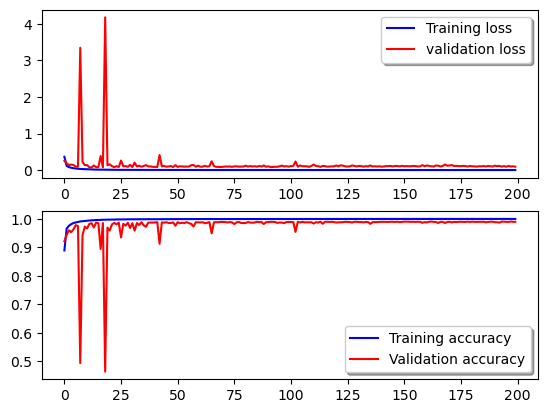

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

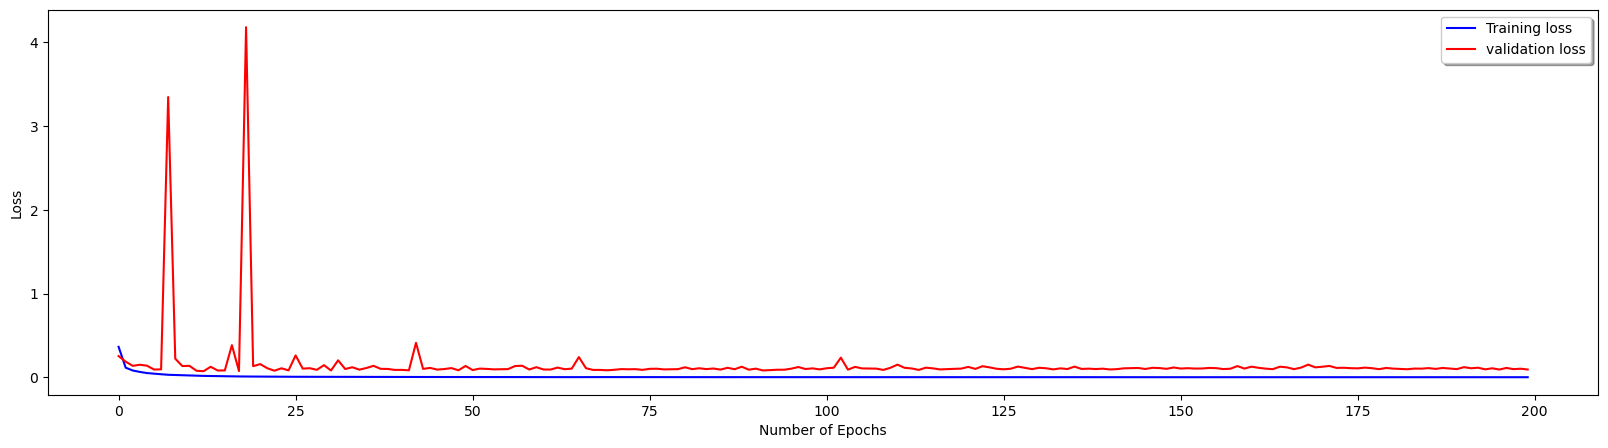

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(1,1, figsize=(20, 5))
ax.plot(history.history['loss'], color='b', label="Training loss")
ax.plot(history.history['val_loss'], color='r', label="validation loss",axes = ax)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
legend = ax.legend(loc='best', shadow=True)

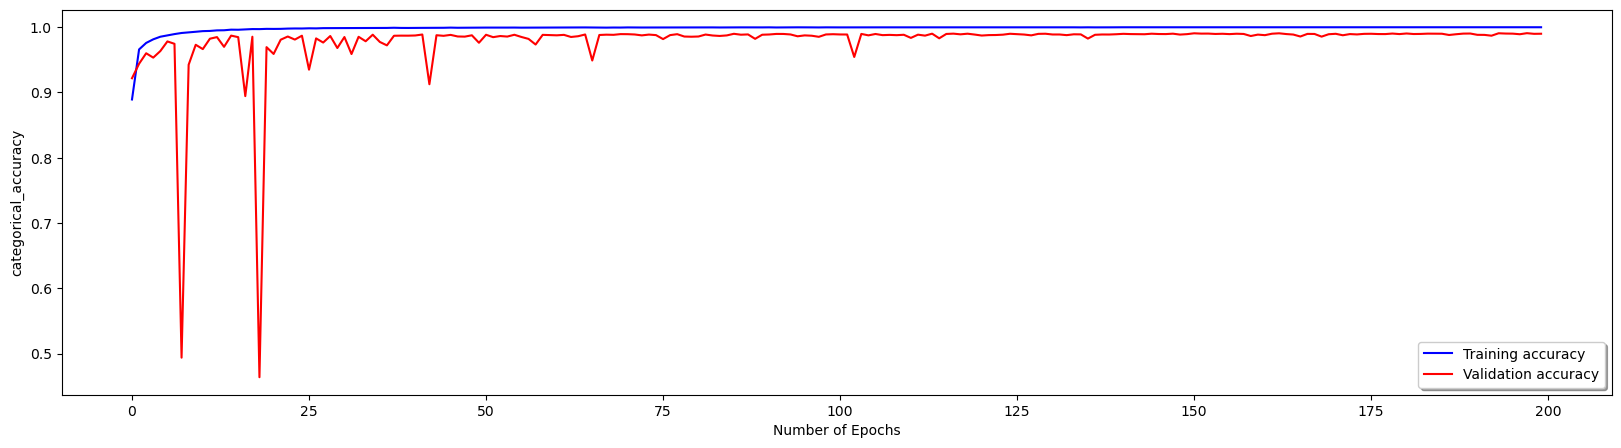

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
ax.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("categorical_accuracy")
legend = ax.legend(loc = 'best', shadow = True)

1200/1200 [==============================] - 17s 6ms/step


<Figure size 1500x1500 with 0 Axes>

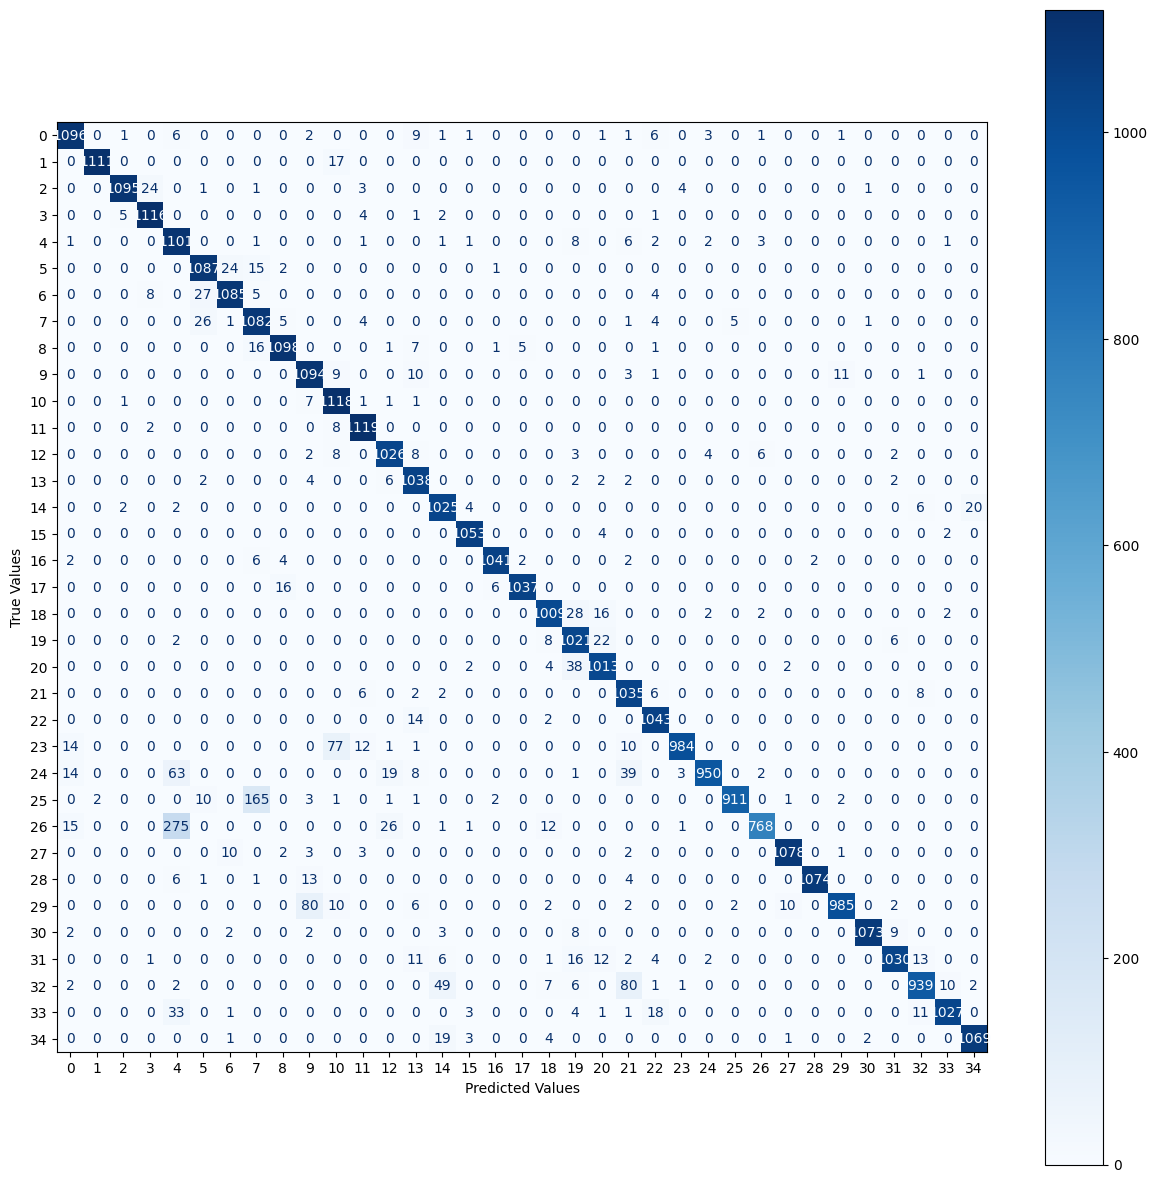

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig = plt.figure(figsize=(15, 15)) # Set Figure

# Calculate the confusion matrix
y_pred = model.predict(x_te)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_te, axis=1)
cm = confusion_matrix(y_true, y_pred, labels=range(35))

# Plot the confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm, display_labels=range(35))
fig, ax = plt.subplots(figsize=(15, 15))
cmd.plot(cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the number of true samples
n_true = np.sum(cm)

# Calculate the number of classified samples
n_classified = np.sum(cm, axis=0)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_true, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')

print("Number of True Samples:", n_true)
print("Number of Classified Samples:", n_classified)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Number of True Samples: 38381
Number of Classified Samples: [1146 1113 1104 1151 1490 1154 1124 1292 1127 1210 1248 1153 1081 1117
 1109 1068 1051 1044 1049 1135 1071 1190 1091  993  963  918  782 1092
 1076 1000 1077 1051  978 1042 1091]
Accuracy: 0.9491936114223183
Precision: 0.9533983598536908
Recall: 0.9491936114223183
F1 Score: 0.9491474709745417


In [ ]:
x_test.shape,  y_test.shape

((4, 28, 28, 1), (4, 35))

In [ ]:
import tensorflow as tf

657/657 [==============================] - 4s 6ms/step


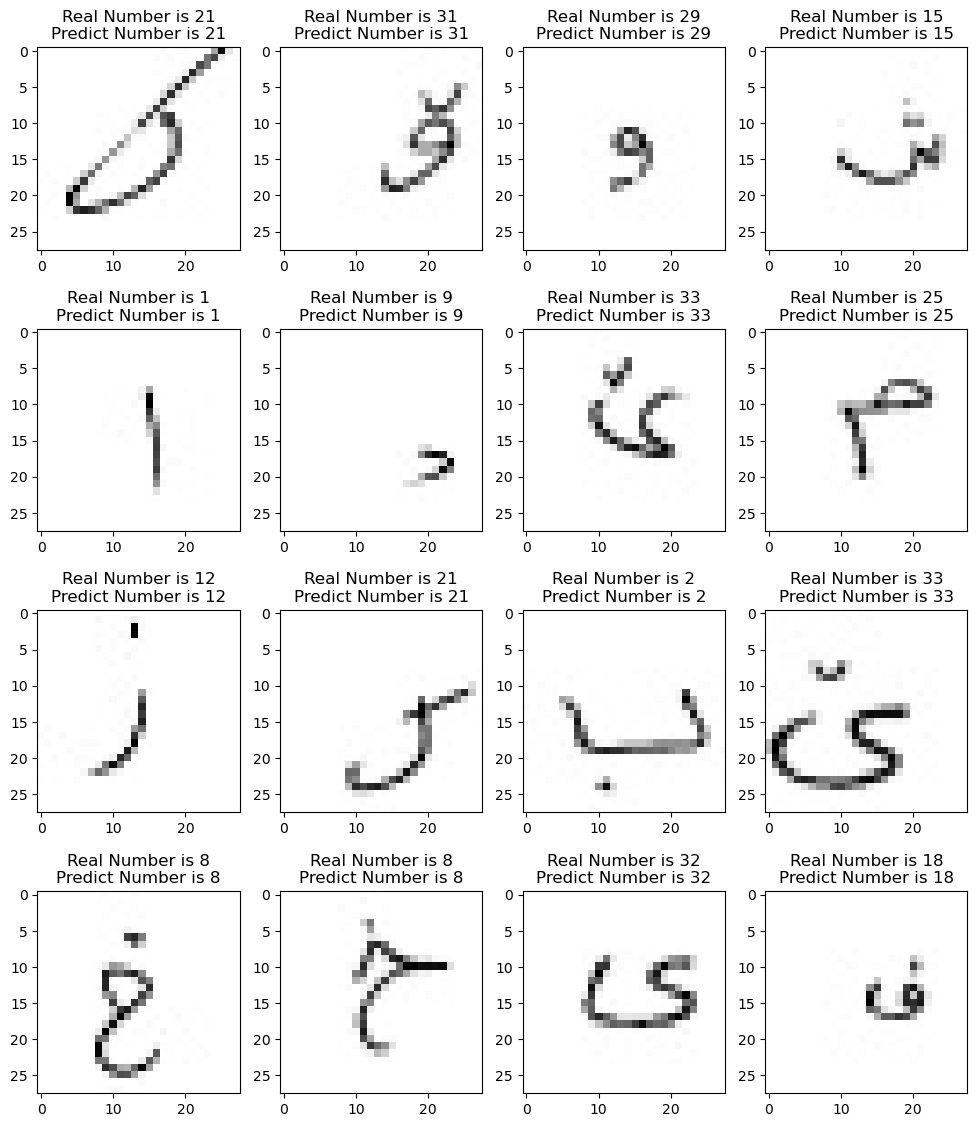

In [ ]:
y_pred = model.predict(x_val)
X_test__ = tf.reshape(x_val, [x_val.shape[0], 28, 28])

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_val[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");